# Responsi Bimbingan Karir

Nama : Laurentius Joandanu
NIM : A11.2022.14179


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE

# EDA


## Load *Data*

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Cek Dataset
df = pd.read_csv('/content/drive/My Drive/Bengkel Koding/weatherAUS.csv')

# Baca dataset
df.head(10)

Mounted at /content/drive


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


## Cek Data

In [ ]:
# Cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# Memeriksa ringkasan statistik
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## Heatmap Korelasi

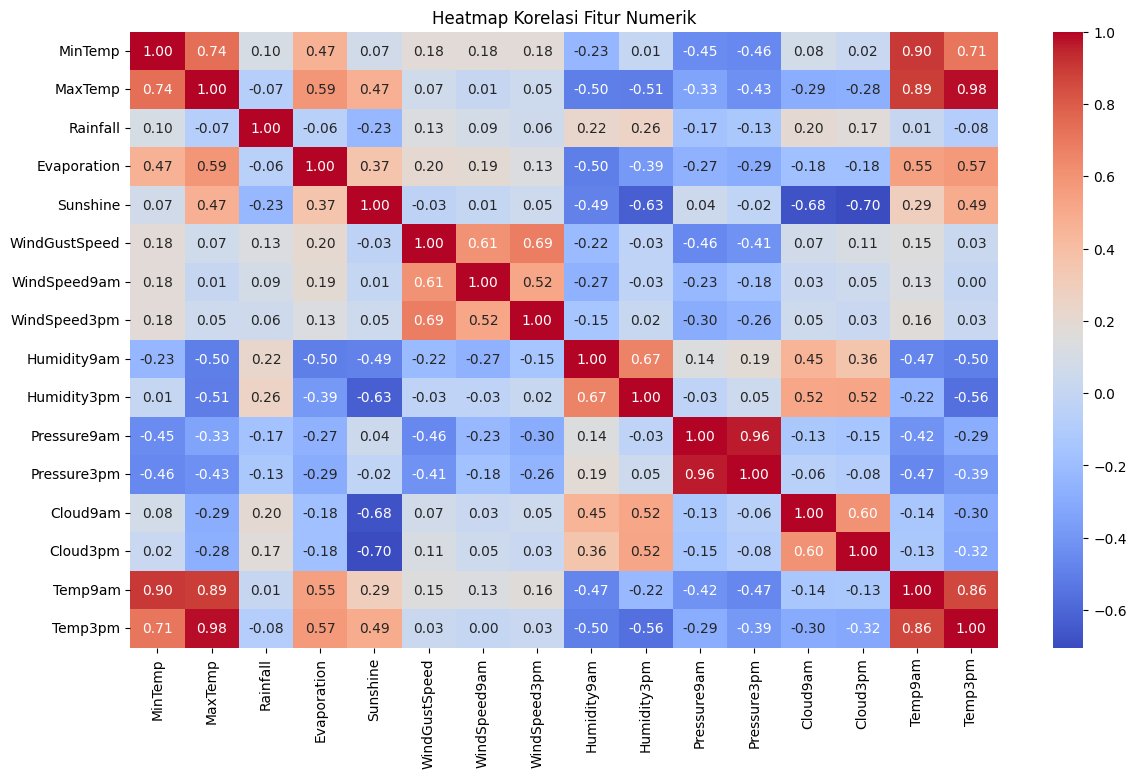

In [ ]:
# heatmap korelasi
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

## Cek Imbalance

/tmp/ipython-input-3977124302.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RainTomorrow', palette='coolwarm')


Text(0, 0.5, 'Count')

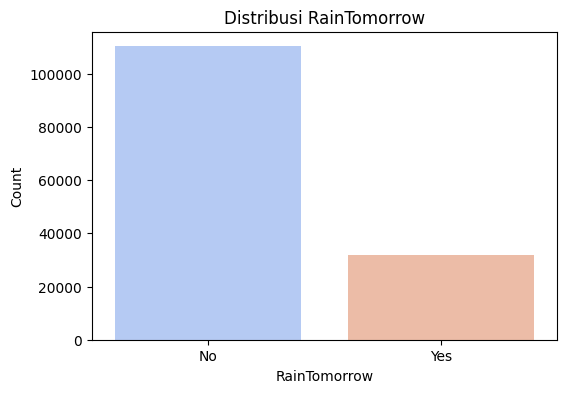

In [ ]:
# Cek Imbalance Data
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='RainTomorrow', palette='coolwarm')
plt.title('Distribusi RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')

# PREPROCESSING

## Cek Missing Value

In [ ]:
# Cek missing value
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


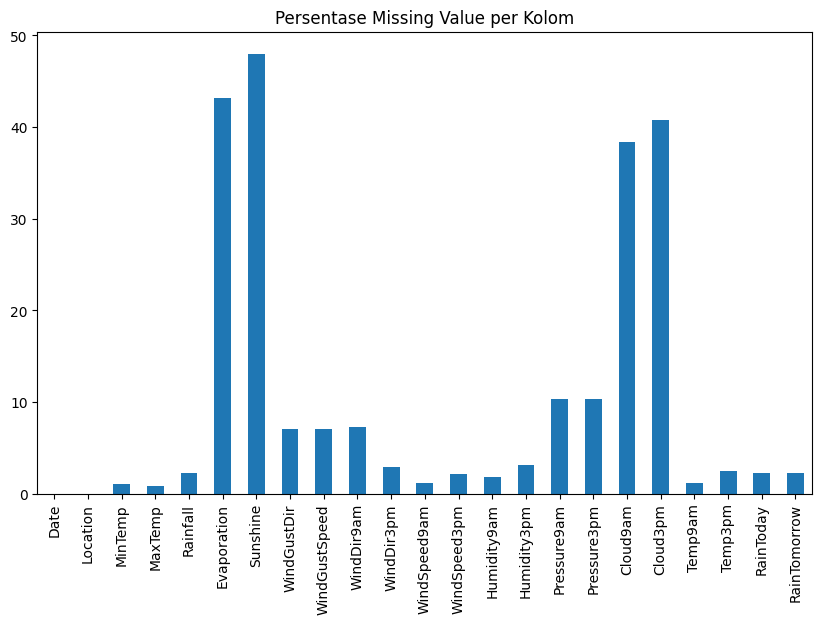

In [ ]:
# Hitung jumlah dan persentase missing value untuk setiap kolom
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# Visualisasi dalam bentuk diagram batang
plt.figure(figsize=(10,6))
missing_percent.plot(kind='bar')
plt.title('Persentase Missing Value per Kolom')
plt.show()

Handling Missing Value

In [ ]:
# Imputasi missing value
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# cek apakah sudah bersih
print(df.isnull().sum().sum(), "missing value tersisa")
df.isnull().sum()

0 missing value tersisa


,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [ ]:
# Buang data yang targetnya kosong
df = df.dropna(subset=['RainTomorrow']).reset_index(drop=True)

# Ubah target jadi biner: No=0, Yes=1
df['RainTomorrow_bin'] = df['RainTomorrow'].map({'Yes':1, 'No':0})

# Tentukan fitur dan target
X = df.drop(columns=['Date', 'RainTomorrow', 'RainTomorrow_bin'])
y = df['RainTomorrow_bin']

# Pisahkan fitur numerik dan kategorikal
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Jumlah fitur numerik:", len(num_cols))
print("Jumlah fitur kategorikal:", len(cat_cols))
print("\nContoh fitur numerik:", num_cols[:5])
print("Contoh fitur kategorikal:", cat_cols[:5])

Jumlah fitur numerik: 16
Jumlah fitur kategorikal: 5

Contoh fitur numerik: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']
Contoh fitur kategorikal: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


## Cek Outlier

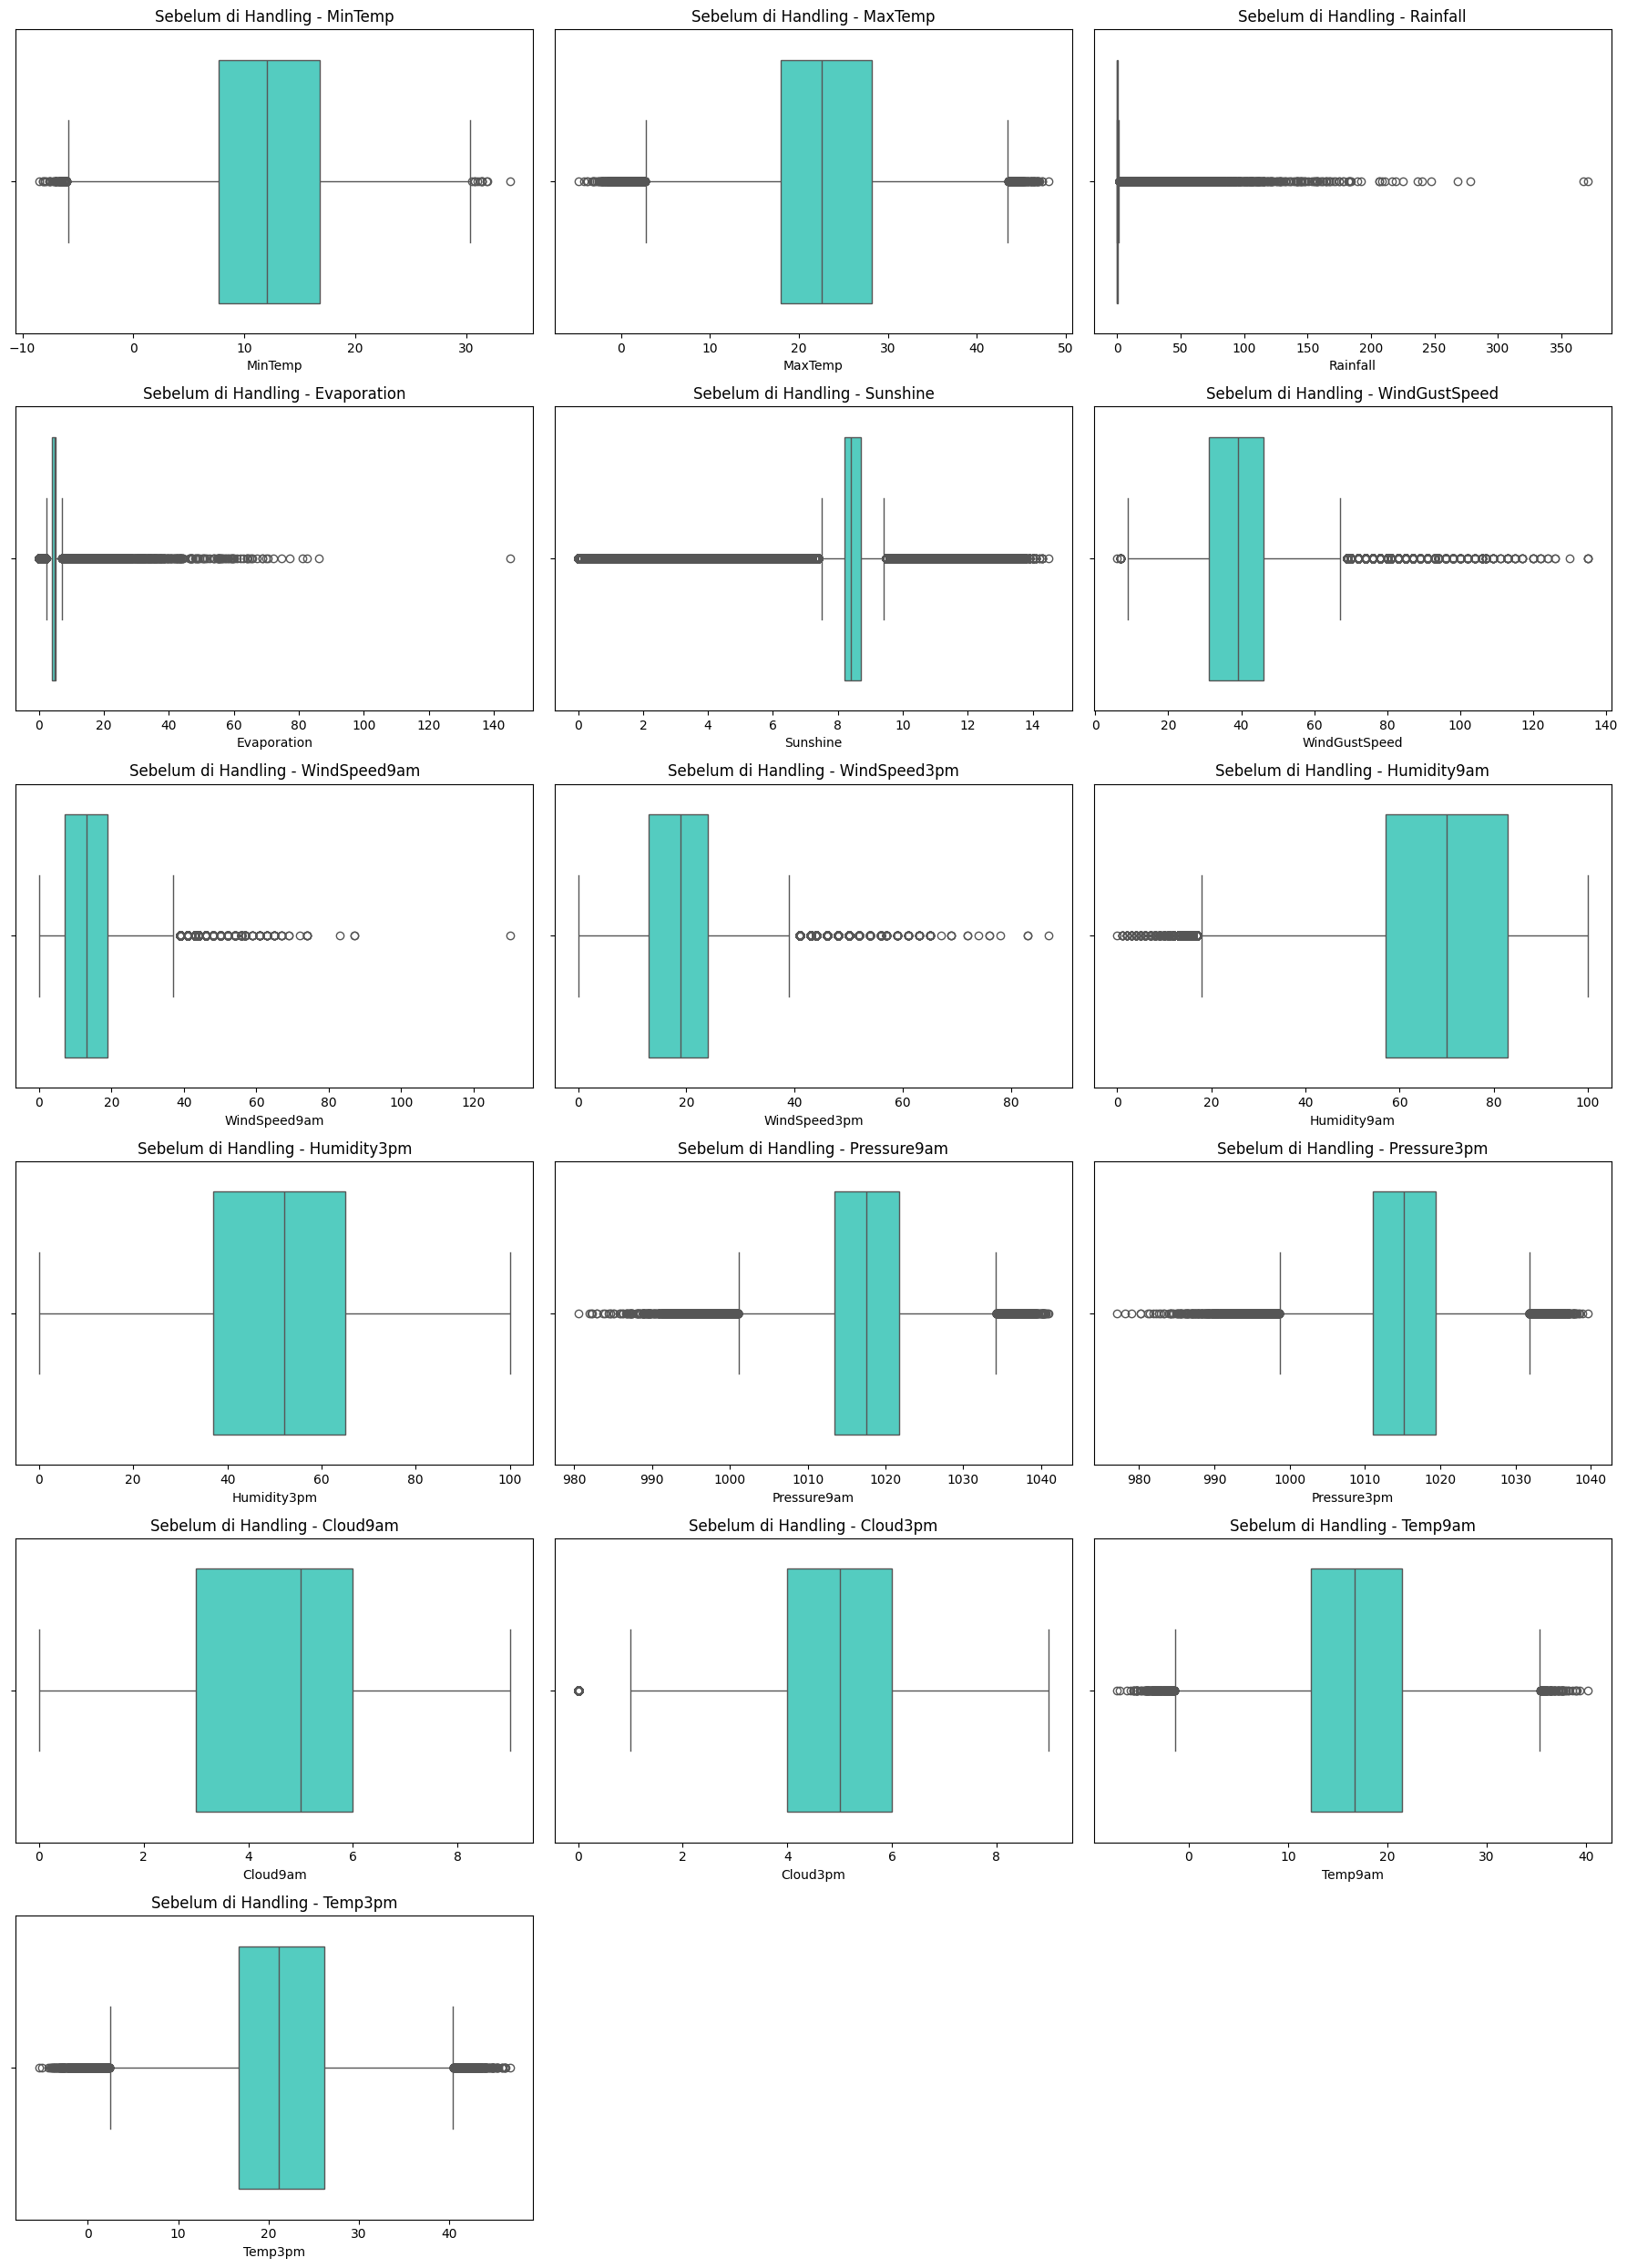

In [ ]:
# Cek outlier
# Tampilkan boxplot awal (sebelum penanganan)
plt.figure(figsize=(18, 25))
for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols)//3)+1, 3, i+1)
    sns.boxplot(x=df[col], color='turquoise')
    plt.title(f"Sebelum di Handling - {col}")
plt.tight_layout()
plt.show()

## Handling Outlier

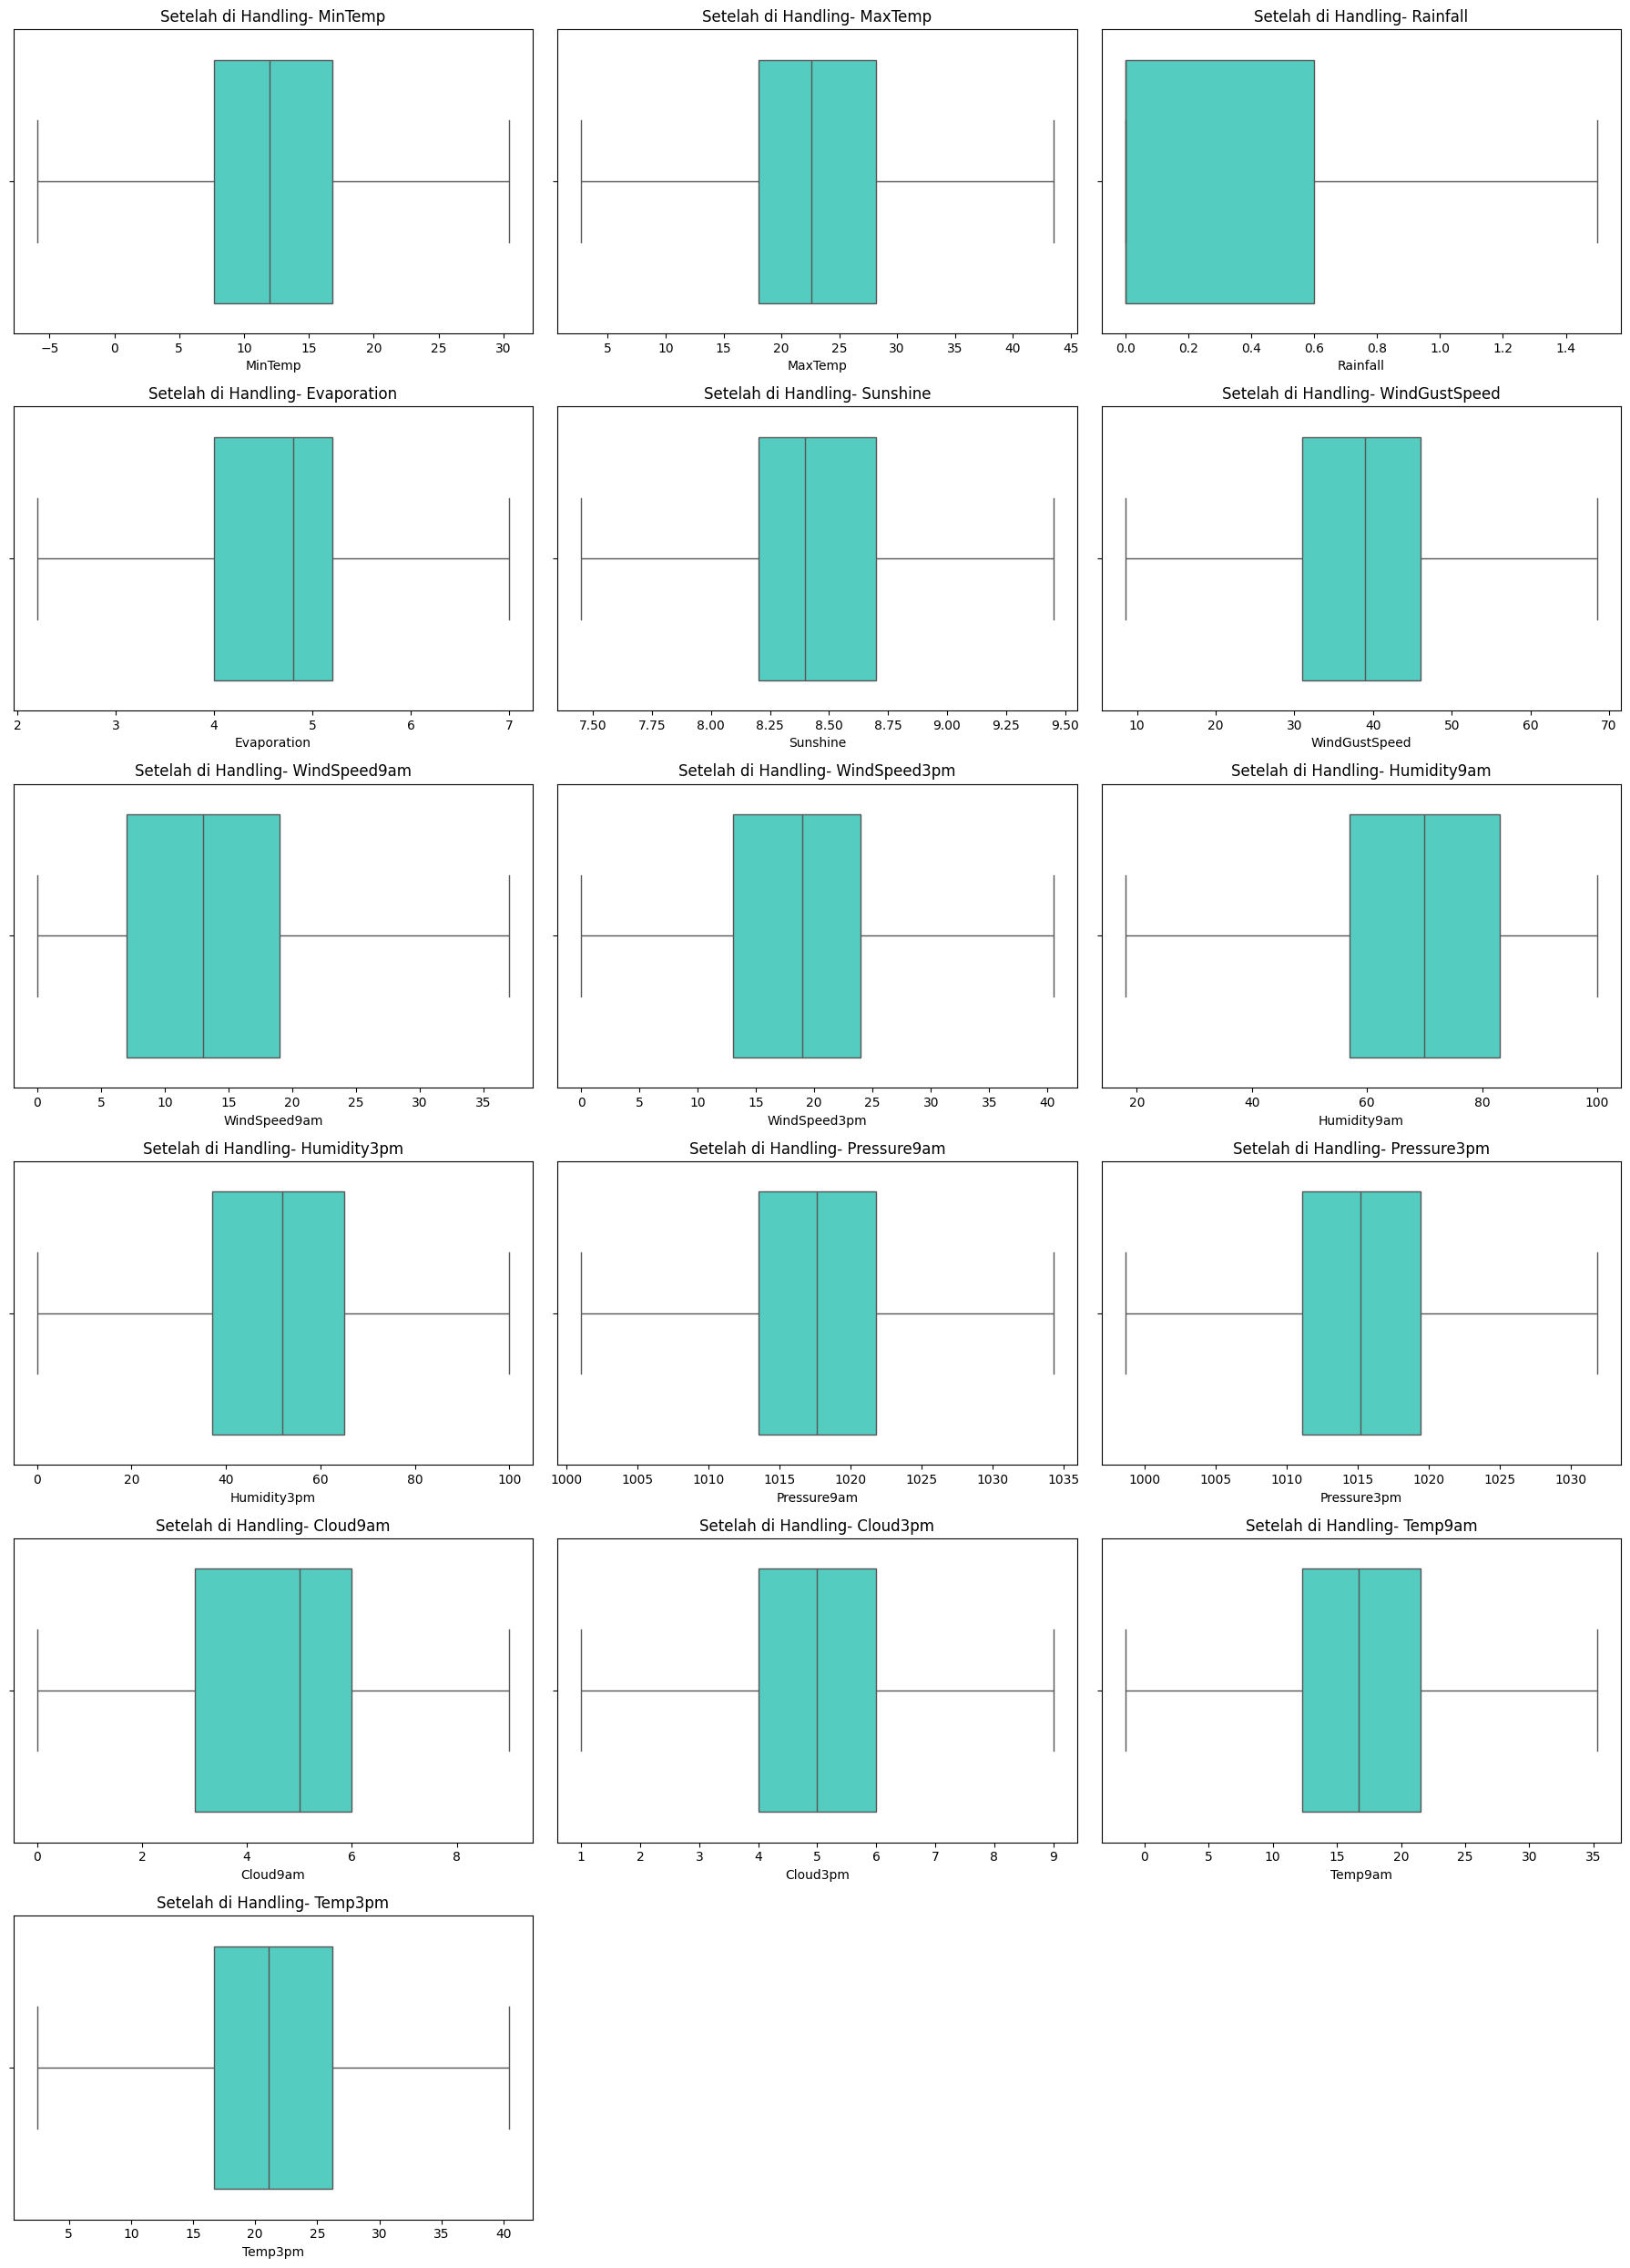

In [ ]:
# Tangani outlier dengan metode IQR untuk semua fitur numerik
def handle_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap nilai di luar batas IQR
        df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound,
                                 np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col]))
    return df_clean
# Terapkan fungsi pada semua fitur numerik
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('RainTomorrow_bin', errors='ignore')
df = handle_outliers_iqr(df, num_cols)

# Visualisasi ulang setelah penanganan
plt.figure(figsize=(18, 25))
for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols)//3)+1, 3, i+1)
    sns.boxplot(x=df[col], color='turquoise')
    plt.title(f"Setelah di Handling- {col}")
plt.tight_layout()
plt.show()

## Cek Nilai Inkonsisten

In [ ]:
# Cek nilai yang inkonsisten / unique
for col in df.columns:
    print(f"\n=== Kolom: {col} ===")
    print(f"Jumlah unique values: {df[col].nunique()}")
    print("Nilai unik:")
    print(df[col].unique())


=== Kolom: Date ===
Jumlah unique values: 3436
Nilai unik:
['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']

=== Kolom: Location ===
Jumlah unique values: 49
Nilai unik:
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']

=== Kolom: MinTemp ===
Jumlah unique values: 363
Nilai unik:
[13.4   7.4  12.9   9.2  17.5  14.6  14.3   7.7   9.7  13.1  15.9  12.6
  8.4   9.8  14.1  13.5  11.2  11.5  17.1  20.5  15.3  16.2  16.9  20.1
 19.7 

## Encoding

In [ ]:
# One-hot encoding untuk fitur kategorikal
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cat = pd.DataFrame(encoder.fit_transform(df[cat_cols]), columns=encoder.get_feature_names_out(cat_cols))

# Simpan nama kolom hasil encoding
encoded_cat.columns = encoder.get_feature_names_out(cat_cols)

# Gabungkan hasil encoding ke fitur numerik
df_encoded = pd.concat([df[num_cols].reset_index(drop=True), encoded_cat], axis=1)

# Tambahkan kolom target
df_encoded['RainTomorrow_bin'] = df['RainTomorrow_bin'].values

## Split Data

In [ ]:
# Split Data 80:20

X = df_encoded.drop(columns=['RainTomorrow_bin'])
y = df_encoded['RainTomorrow_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (116368, 115)
Test shape : (29092, 115)


## Standarisasi

In [ ]:
# Stadarisasi

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols]  = scaler.transform(X_test[num_cols])

# MODELING

## Logistic Regresion

===== Evaluasi Model: Logistic Regression (Preprocessing) =====
Akurasi : 0.851436821119208
Presisi : 0.8420129947245218
Recall  : 0.851436821119208
F1 Score: 0.8413714083433365

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22717
           1       0.73      0.51      0.60      6375

    accuracy                           0.85     29092
   macro avg       0.80      0.73      0.76     29092
weighted avg       0.84      0.85      0.84     29092



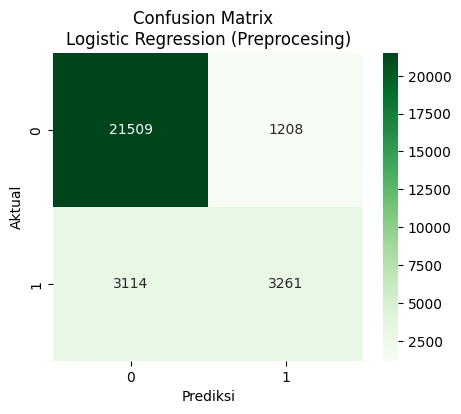

In [ ]:
lr_model_pre = LogisticRegression(max_iter=1000, random_state=42)
lr_model_pre.fit(X_train_scaled, y_train)

y_pred_lr_pre = lr_model_pre.predict(X_test_scaled)

print("===== Evaluasi Model: Logistic Regression (Preprocessing) =====")
print("Akurasi :", accuracy_score(y_test, y_pred_lr_pre))
print("Presisi :", precision_score(y_test, y_pred_lr_pre, average='weighted'))
print("Recall  :", recall_score(y_test, y_pred_lr_pre, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr_pre, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr_pre))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr_pre), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix  \nLogistic Regression (Preprocesing)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

## Random Forest

===== Evaluasi Model: Random Forest (Preprocessing) =====
Akurasi : 0.8585521792932765
Presisi : 0.8512101642778261
Recall  : 0.8585521792932765
F1 Score: 0.8461394182704206

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22717
           1       0.78      0.49      0.60      6375

    accuracy                           0.86     29092
   macro avg       0.83      0.73      0.76     29092
weighted avg       0.85      0.86      0.85     29092



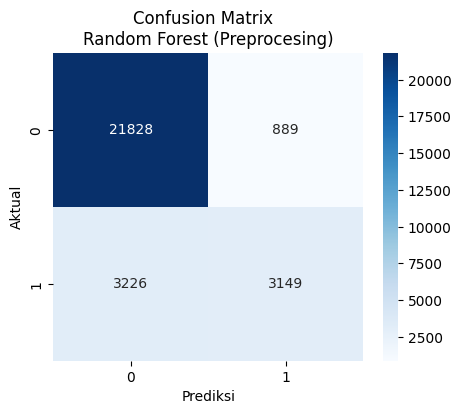

In [ ]:
# Random Forest
rf_model_pre = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model_pre.fit(X_train_scaled, y_train)

y_pred_rf_pre = rf_model_pre.predict(X_test_scaled)

print("===== Evaluasi Model: Random Forest (Preprocessing) =====")
print("Akurasi :", accuracy_score(y_test, y_pred_rf_pre))
print("Presisi :", precision_score(y_test, y_pred_rf_pre, average='weighted'))
print("Recall  :", recall_score(y_test, y_pred_rf_pre, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf_pre, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_pre))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_pre), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix  \nRandom Forest (Preprocesing)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

## Decision Tree

===== Evaluasi Model: Decision Tree (Preprocessing) =====
Akurasi : 0.7920390485356799
Presisi : 0.7947021330331322
Recall  : 0.7920390485356799
F1 Score: 0.7933191151325854

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     22717
           1       0.52      0.54      0.53      6375

    accuracy                           0.79     29092
   macro avg       0.70      0.70      0.70     29092
weighted avg       0.79      0.79      0.79     29092



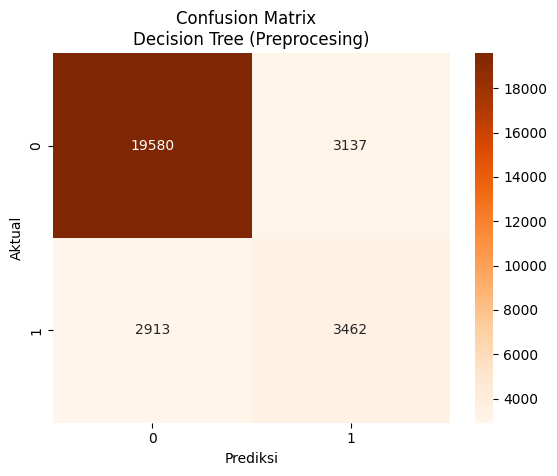

In [ ]:
# Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_scaled, y_train)

y_pred_dt_pre = model_dt.predict(X_test_scaled)

print("===== Evaluasi Model: Decision Tree (Preprocessing) =====")
print("Akurasi :", accuracy_score(y_test, y_pred_dt_pre))
print("Presisi :", precision_score(y_test, y_pred_dt_pre, average='weighted'))
print("Recall  :", recall_score(y_test, y_pred_dt_pre, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_dt_pre, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_pre))


# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_pre), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix  \nDecision Tree (Preprocesing)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

## Perbandingan Model

,Model,Accuracy,F1_Score
0,Logistic Regression,0.851437,0.841371
1,Random Forest,0.858552,0.846139
2,Decission Tree,0.792039,0.793319


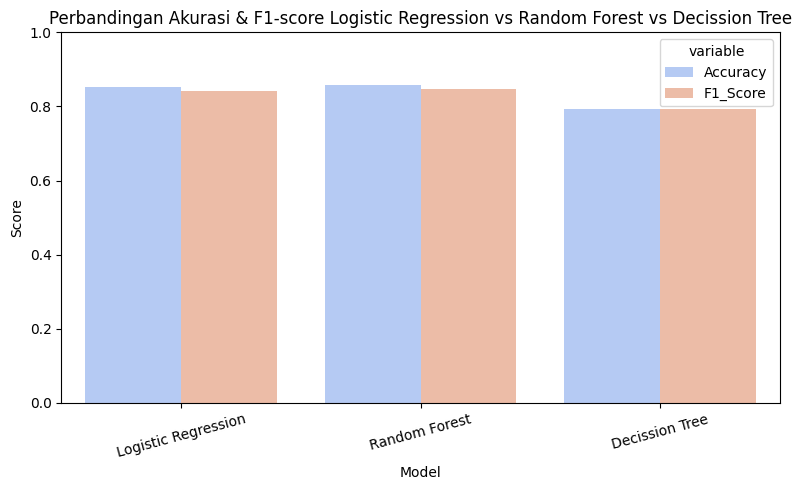

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decission Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr_pre),
        accuracy_score(y_test, y_pred_rf_pre),
        accuracy_score(y_test, y_pred_dt_pre)
    ],
    'F1_Score': [
        f1_score(y_test, y_pred_lr_pre, average='weighted'),
        f1_score(y_test, y_pred_rf_pre, average='weighted'),
        f1_score(y_test, y_pred_dt_pre, average='weighted')
    ]
})

display(results)

plt.figure(figsize=(8,5))
sns.barplot(
    data=results.melt(id_vars='Model', value_vars=['Accuracy', 'F1_Score']),
    x='Model', y='value', hue='variable', palette='coolwarm'
)
plt.title('Perbandingan Akurasi & F1-score Logistic Regression vs Random Forest vs Decission Tree')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# OPTIMASI

## Cek Imbalance

/tmp/ipython-input-136945182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='coolwarm')


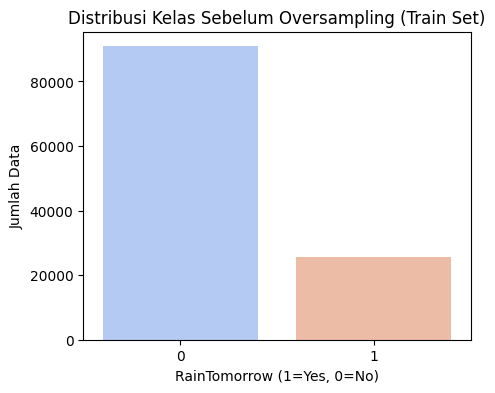

Jumlah sampel tiap kelas sebelum SMOTE:
RainTomorrow_bin
0    90866
1    25502
Name: count, dtype: int64


In [ ]:
# Cek distribusi awal
plt.figure(figsize=(5,4))
sns.countplot(x=y_train, palette='coolwarm')
plt.title("Distribusi Kelas Sebelum Oversampling (Train Set)")
plt.xlabel("RainTomorrow (1=Yes, 0=No)")
plt.ylabel("Jumlah Data")
plt.show()

print("Jumlah sampel tiap kelas sebelum SMOTE:")
print(y_train.value_counts())

## Handling Imbalance

/tmp/ipython-input-1055947968.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_over, palette='coolwarm')


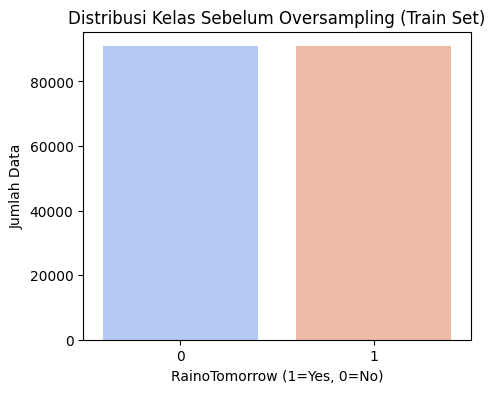

Jumlah sampel tiap kelas sebelum SMOTE:
RainTomorrow_bin
0    90866
1    90866
Name: count, dtype: int64


In [ ]:
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train_scaled, y_train)

# Cek distribusi setelah dilakukan smote
plt.figure(figsize=(5,4))
sns.countplot(x=y_train_over, palette='coolwarm')
plt.title("Distribusi Kelas Sebelum Oversampling (Train Set)")
plt.xlabel("RainoTomorrow (1=Yes, 0=No)")
plt.ylabel("Jumlah Data")
plt.show()

print("Jumlah sampel tiap kelas sebelum SMOTE:")
print(y_train_over.value_counts())

## Modeling LR + SMOTE + TUNING

===== Logistic Regression (Best Params) =====
LogisticRegression(C=1, max_iter=1000, random_state=42, solver='liblinear')

--- Evaluasi Logistic Regression ---
Accuracy : 0.7909047160731473
Precision: 0.515249634426572
Recall   : 0.7738039215686274
F1-Score : 0.6185967772274124

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     22717
           1       0.52      0.77      0.62      6375

    accuracy                           0.79     29092
   macro avg       0.72      0.78      0.74     29092
weighted avg       0.84      0.79      0.80     29092



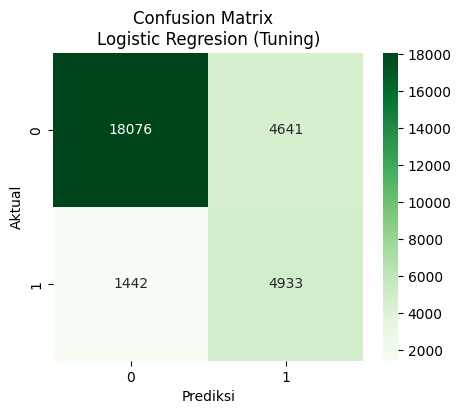

In [ ]:
# Logistic Regression — RandomizedSearch
lr = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

param_lr = {
    'C': [0.01, 0.1, 1, 10, 100]
}

rand_lr = RandomizedSearchCV(
    lr, param_lr,
    n_iter=5,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

rand_lr.fit(X_train_over, y_train_over)
best_lr = rand_lr.best_estimator_

print("===== Logistic Regression (Best Params) =====")
print(best_lr)

# Evaluasi
y_pred_lr_tuning = best_lr.predict(X_test_scaled)

print("\n--- Evaluasi Logistic Regression ---")
print("Accuracy :", accuracy_score(y_test, y_pred_lr_tuning))
print("Precision:", precision_score(y_test, y_pred_lr_tuning))
print("Recall   :", recall_score(y_test, y_pred_lr_tuning))
print("F1-Score :", f1_score(y_test, y_pred_lr_tuning))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr_tuning))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr_tuning), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix  \nLogistic Regresion (Tuning)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


## Modeling RF + SMOTE (Tanpa Tuning)


--- Evaluasi Random Forest ---
Accuracy : 0.8512993262752647
Precision: 0.848031124679273
Recall   : 0.8512993262752647
F1-Score : 0.849438463943205

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     22717
           1       0.67      0.63      0.65      6375

    accuracy                           0.85     29092
   macro avg       0.78      0.77      0.78     29092
weighted avg       0.85      0.85      0.85     29092



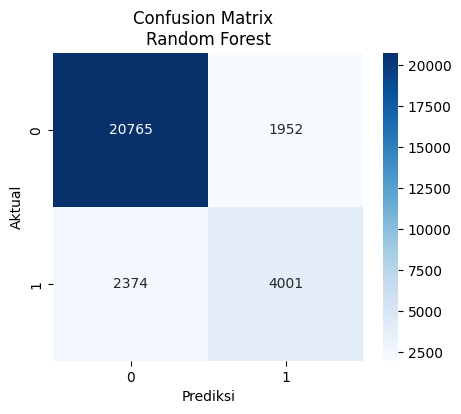

In [ ]:
# Random Forest — RandomizedSearch
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_over, y_train_over)

# Evaluasi
y_pred_rf_smote = rf.predict(X_test_scaled)

print("\n--- Evaluasi Random Forest ---")
print("Accuracy :", accuracy_score(y_test, y_pred_rf_smote))
print("Precision:", precision_score(y_test, y_pred_rf_smote, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_rf_smote, average='weighted'))
print("F1-Score :", f1_score(y_test, y_pred_rf_smote, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_smote))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_smote), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix  \nRandom Forest")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


## Modeling DT + SMOTE + TUNING

===== Decision Tree (Best Params) =====
DecisionTreeClassifier(criterion='log_loss', max_features='sqrt',
                       min_samples_split=5, random_state=42)
===== Evaluasi Model: Decision Tree (Preprocessing) =====
Akurasi : 0.7920390485356799
Presisi : 0.7947021330331322
Recall  : 0.7920390485356799
F1 Score: 0.7933191151325854

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     22717
           1       0.52      0.54      0.53      6375

    accuracy                           0.79     29092
   macro avg       0.70      0.70      0.70     29092
weighted avg       0.79      0.79      0.79     29092



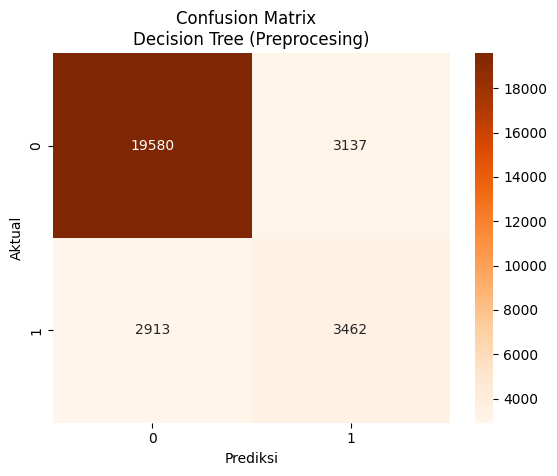

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)

param_dt = {
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': [None, 'sqrt', 'log2']
}

rand_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dt,
    n_iter=30,
    cv=3,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1
)

rand_dt.fit(X_train_over, y_train_over)
best_dt = rand_dt.best_estimator_

print("===== Decision Tree (Best Params) =====")
print(best_dt)

# evaluasi
y_pred_dt_tuning = model_dt.predict(X_test_scaled)

print("===== Evaluasi Model: Decision Tree (Preprocessing) =====")
print("Akurasi :", accuracy_score(y_test, y_pred_dt_tuning))
print("Presisi :", precision_score(y_test, y_pred_dt_tuning, average='weighted'))
print("Recall  :", recall_score(y_test, y_pred_dt_tuning, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_dt_tuning, average='weighted'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_tuning))


# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_tuning), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix  \nDecision Tree (Preprocesing)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

## Perbandingan Model Sesudah di Optimasi

,Model,Accuracy,F1_Score
0,Logistic Regression (Prep),0.851437,0.841371
1,Logistic Regression (Optimasi),0.790905,0.803956
2,Random Forest (Prep),0.858552,0.846139
3,Random Forest (Optimasi),0.851299,0.849438
4,Decision Tree (Prep),0.792039,0.793319
5,Decision Tree (Optimasi),0.792039,0.793319


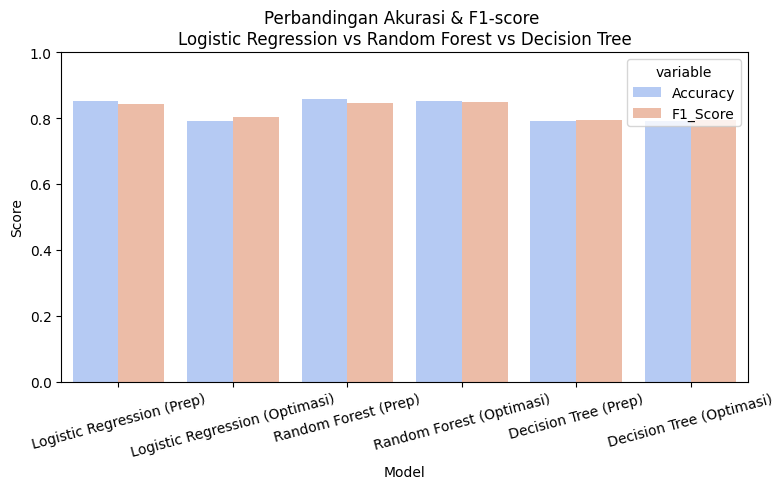

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression (Prep)', 'Logistic Regression (Optimasi)', 'Random Forest (Prep)', 'Random Forest (Optimasi)', 'Decision Tree (Prep)', 'Decision Tree (Optimasi)'],

    'Accuracy': [
        accuracy_score(y_test, y_pred_lr_pre),
        accuracy_score(y_test, y_pred_lr_tuning),
        accuracy_score(y_test, y_pred_rf_pre),
        accuracy_score(y_test, y_pred_rf_smote),
        accuracy_score(y_test, y_pred_dt_pre),
        accuracy_score(y_test, y_pred_dt_tuning)
    ],
    'F1_Score': [
        f1_score(y_test, y_pred_lr_pre, average='weighted'),
        f1_score(y_test, y_pred_lr_tuning, average='weighted'),
        f1_score(y_test, y_pred_rf_pre, average='weighted'),
        f1_score(y_test, y_pred_rf_smote, average='weighted'),
        f1_score(y_test, y_pred_dt_pre, average='weighted'),
        f1_score(y_test, y_pred_dt_tuning, average='weighted')
    ]
})

display(results)

plt.figure(figsize=(8,5))
sns.barplot(
    data=results.melt(id_vars='Model', value_vars=['Accuracy', 'F1_Score']),
    x='Model', y='value', hue='variable', palette='coolwarm'
)
plt.title('Perbandingan Akurasi & F1-score \nLogistic Regression vs Random Forest vs Decision Tree')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()